In [38]:
import joblib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, mean_squared_error, precision_recall_curve

In [25]:
models_info = {
    "CNN": {
        "tokenizer": joblib.load('../lib/models/NeuralNetworks/Convolutional/Variables/tokenizer.pkl'),
        "padded_sequences": joblib.load('../lib/models/NeuralNetworks/Convolutional/Variables/padded_sequences.pkl'),
        "encoded_labels": joblib.load('../lib/models/NeuralNetworks/Convolutional/Variables/encoded_labels.pkl'),
        "label_encoder": joblib.load('../lib/models/NeuralNetworks/Convolutional/Variables/label_encoder.pkl'),
        "model": load_model('../lib/models/NeuralNetworks/Convolutional/conv_one_98.keras')
    },
    "FeedForward": {
        "model": load_model('../lib/models/NeuralNetworks/FeedForward/fnn_three_hidden_61.keras'),
        "padded_sequences": joblib.load('../lib/models/NeuralNetworks/FeedForward/Variables/padded_sequences.pkl'),
        "encoded_labels": joblib.load('../lib/models/NeuralNetworks/FeedForward/Variables/encoded_labels.pkl')
    },
    "LSTM": {
        "model": load_model('../lib/models/NeuralNetworks/LSTM/lstm_three_98.keras'),
        "padded_sequences": joblib.load('../lib/models/NeuralNetworks/LSTM/Variables/padded_sequences.pkl'),
        "encoded_labels": joblib.load('../lib/models/NeuralNetworks/LSTM/Variables/encoded_labels.pkl')
    },
    "Logistic Regression": {
        "tfidf": joblib.load('../lib/models/Supervised/Variables/log_tfidf_vectorizer.pkl'),
        "scaler": joblib.load('../lib/models/Supervised/Variables/log_scaler.pkl'),
        "X_train": joblib.load('../lib/models/Supervised/Variables/X_train.pkl'),
        "X_test": joblib.load('../lib/models/Supervised/Variables/X_test.pkl'),
        "y_train": joblib.load('../lib/models/Supervised/Variables/y_train.pkl'),
        "y_test": joblib.load('../lib/models/Supervised/Variables/y_test.pkl'),
        "model": joblib.load('../lib/models/Supervised/logistic_regression_model.pkl')
    }
}

In [26]:
# Use each model to make predictions and calculate metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'RMSE']
model_metrics = {}
confusion_matrices = {}

In [32]:
# CNN Model
y_pred_prob_cnn = models_info['CNN']['model'].predict(models_info['CNN']['padded_sequences'])
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int).flatten()
encoded_labels_cnn = models_info['CNN']['encoded_labels']
rmse_cnn = np.sqrt(mean_squared_error(encoded_labels_cnn, y_pred_prob_cnn))
model_metrics['CNN'] = [
    accuracy_score(encoded_labels_cnn, y_pred_cnn),
    precision_score(encoded_labels_cnn, y_pred_cnn),
    recall_score(encoded_labels_cnn, y_pred_cnn),
    f1_score(encoded_labels_cnn, y_pred_cnn),
    roc_auc_score(encoded_labels_cnn, y_pred_prob_cnn),
    rmse_cnn
]
confusion_matrices['CNN'] = confusion_matrix(encoded_labels_cnn, y_pred_cnn)

2466/2466 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [33]:
# Feed Forward Model
y_pred_prob_ff = models_info['FeedForward']['model'].predict(models_info['FeedForward']['padded_sequences'])
y_pred_ff = (y_pred_prob_ff > 0.5).astype(int).flatten()
encoded_labels_ff = models_info['FeedForward']['encoded_labels']
rmse_ff = np.sqrt(mean_squared_error(encoded_labels_ff, y_pred_prob_ff))
model_metrics['FeedForward'] = [
    accuracy_score(encoded_labels_ff, y_pred_ff),
    precision_score(encoded_labels_ff, y_pred_ff),
    recall_score(encoded_labels_ff, y_pred_ff),
    f1_score(encoded_labels_ff, y_pred_ff),
    roc_auc_score(encoded_labels_ff, y_pred_prob_ff),
    rmse_ff
]
confusion_matrices['FeedForward'] = confusion_matrix(encoded_labels_ff, y_pred_ff)

2466/2466 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step


In [34]:
# LSTM Model
y_pred_prob_lstm = models_info['LSTM']['model'].predict(models_info['LSTM']['padded_sequences'])
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int).flatten()
encoded_labels_lstm = models_info['LSTM']['encoded_labels']
rmse_lstm = np.sqrt(mean_squared_error(encoded_labels_lstm, y_pred_prob_lstm))
model_metrics['LSTM'] = [
    accuracy_score(encoded_labels_lstm, y_pred_lstm),
    precision_score(encoded_labels_lstm, y_pred_lstm),
    recall_score(encoded_labels_lstm, y_pred_lstm),
    f1_score(encoded_labels_lstm, y_pred_lstm),
    roc_auc_score(encoded_labels_lstm, y_pred_prob_lstm),
    rmse_lstm
]
confusion_matrices['LSTM'] = confusion_matrix(encoded_labels_lstm, y_pred_lstm)

2466/2466 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step


In [35]:
# Logistic Regression Model
X_test_scaled = models_info['Logistic Regression']['scaler'].transform(models_info['Logistic Regression']['X_test'])
y_pred_logistic = models_info['Logistic Regression']['model'].predict(X_test_scaled)
y_test = models_info['Logistic Regression']['y_test']
rmse_logistic = np.sqrt(mean_squared_error(y_test, models_info['Logistic Regression']['model'].predict_proba(X_test_scaled)[:, 1]))
model_metrics['Logistic Regression'] = [
    accuracy_score(y_test, y_pred_logistic),
    precision_score(y_test, y_pred_logistic),
    recall_score(y_test, y_pred_logistic),
    f1_score(y_test, y_pred_logistic),
    roc_auc_score(y_test, models_info['Logistic Regression']['model'].predict_proba(X_test_scaled)[:, 1]),
    rmse_logistic
]
confusion_matrices['Logistic Regression'] = confusion_matrix(y_test, y_pred_logistic)


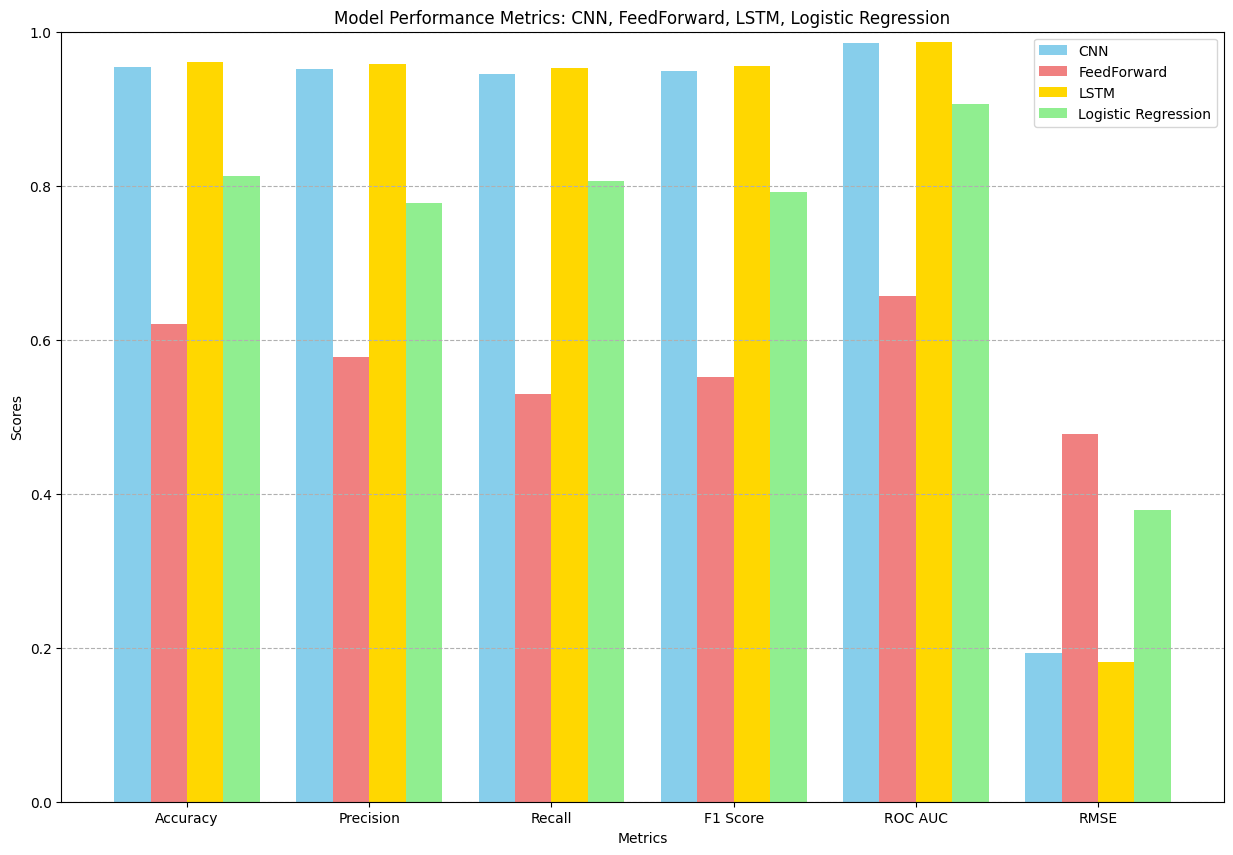

In [36]:
# Create a chart to display the metrics for all models
x = np.arange(len(metrics))
width = 0.2  # width of the bars

plt.figure(figsize=(15, 10))
plt.bar(x - 1.5*width, model_metrics['CNN'], width, label='CNN', color='skyblue')
plt.bar(x - 0.5*width, model_metrics['FeedForward'], width, label='FeedForward', color='lightcoral')
plt.bar(x + 0.5*width, model_metrics['LSTM'], width, label='LSTM', color='gold')
plt.bar(x + 1.5*width, model_metrics['Logistic Regression'], width, label='Logistic Regression', color='lightgreen')

plt.ylim(0, 1)
plt.xticks(x, metrics)
plt.title('Model Performance Metrics: CNN, FeedForward, LSTM, Logistic Regression')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()


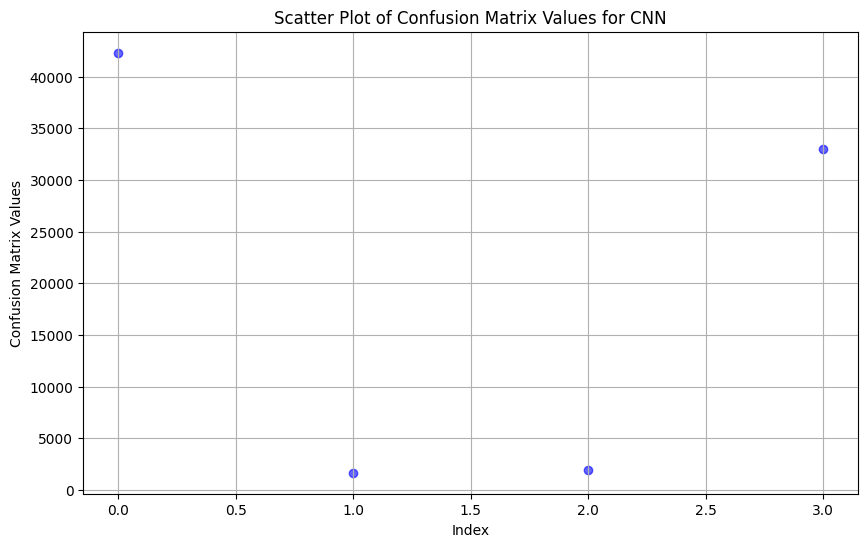

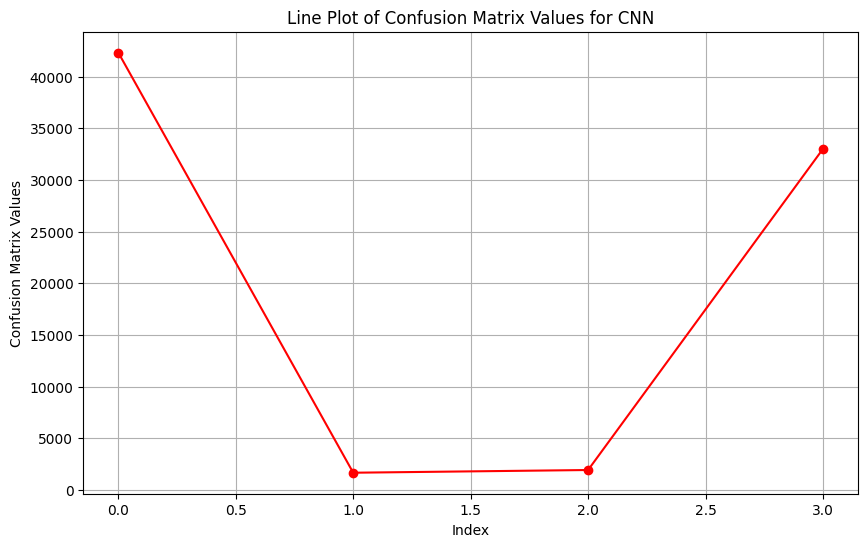

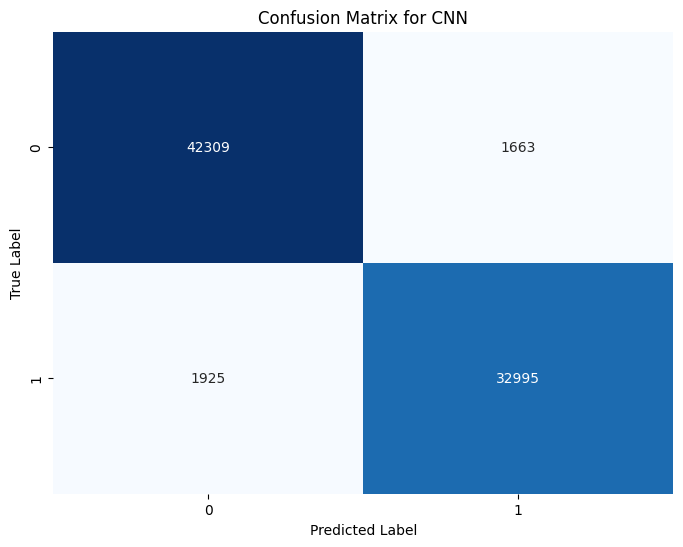

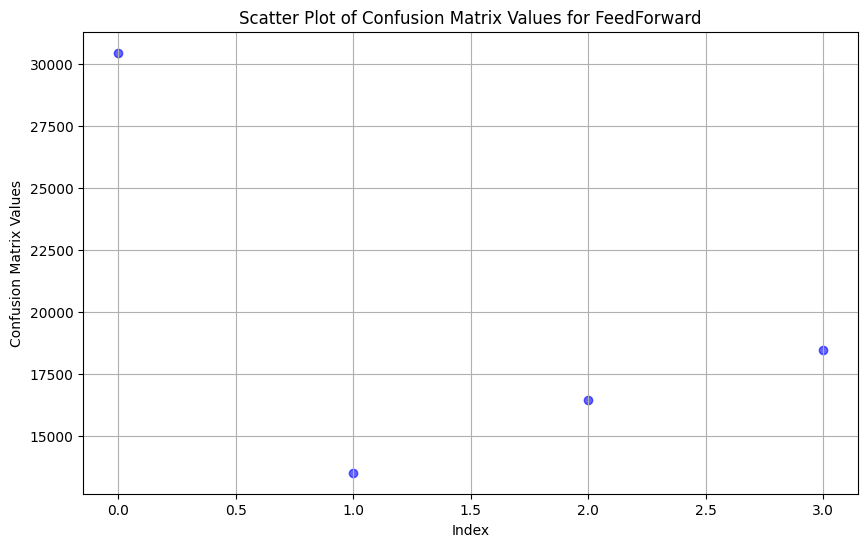

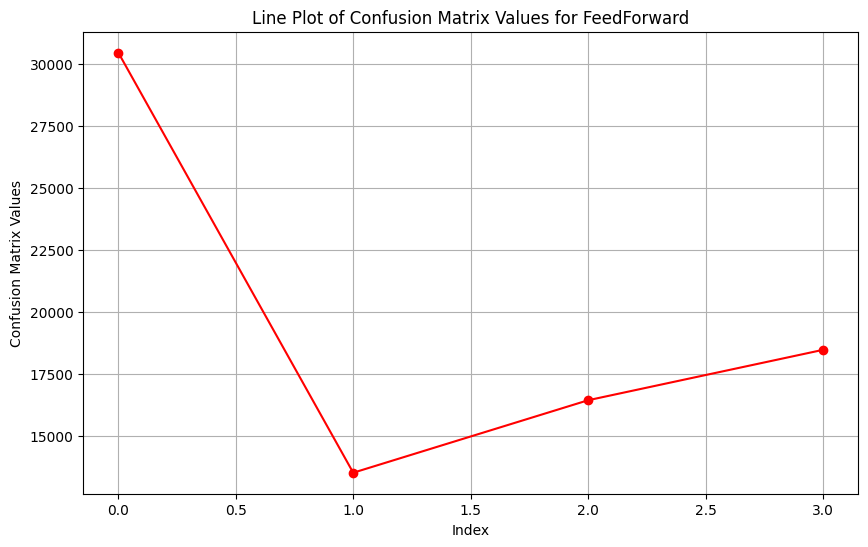

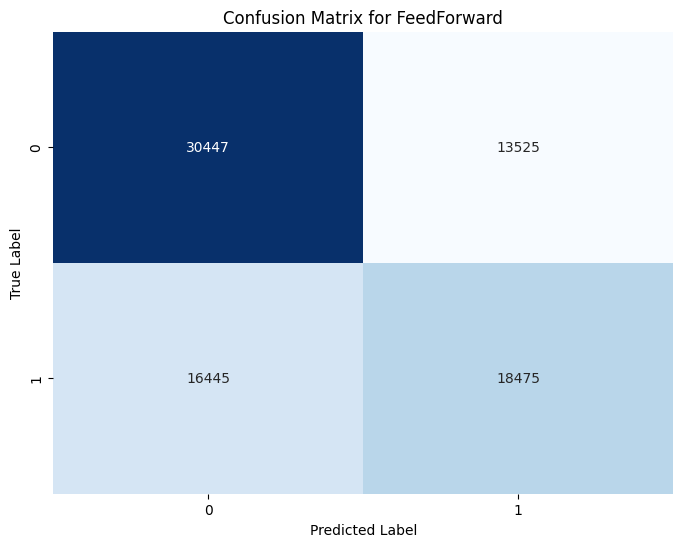

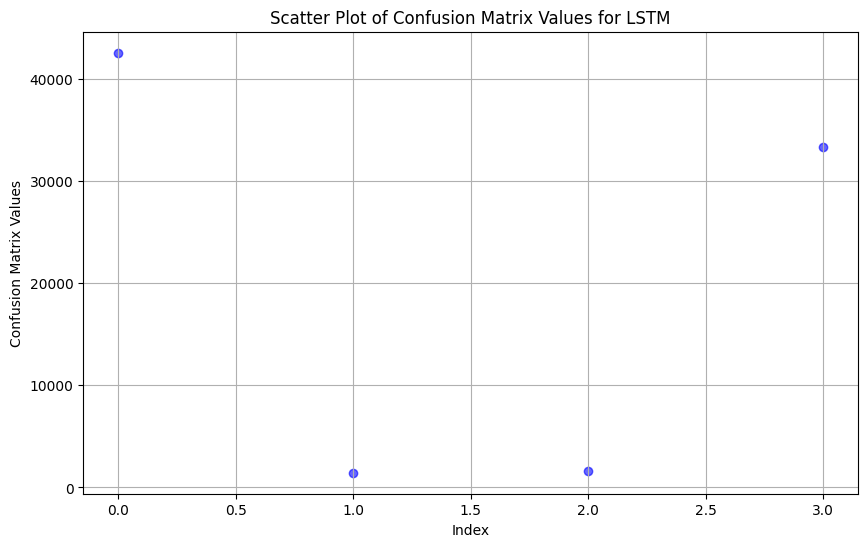

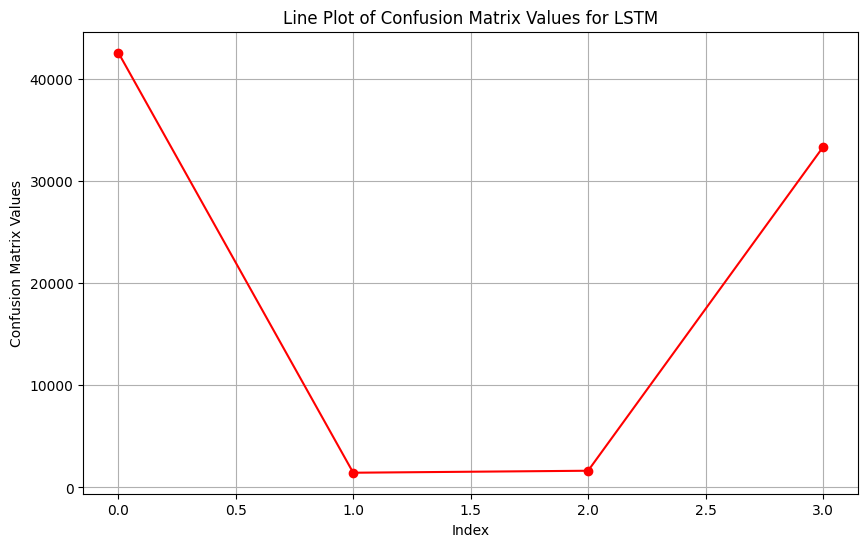

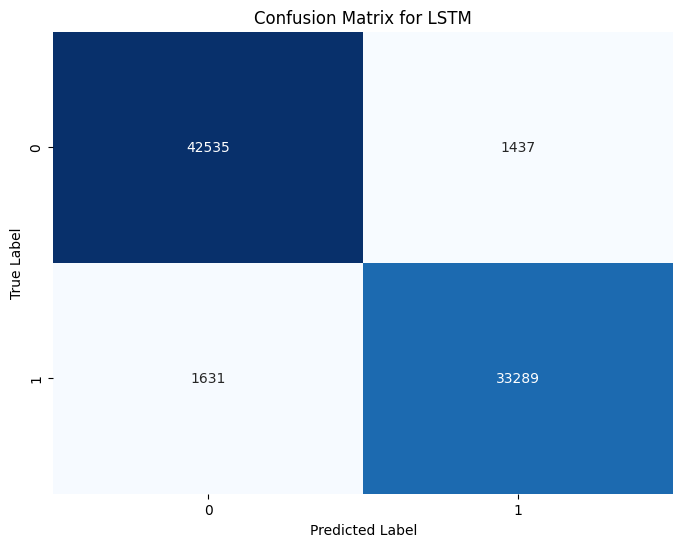

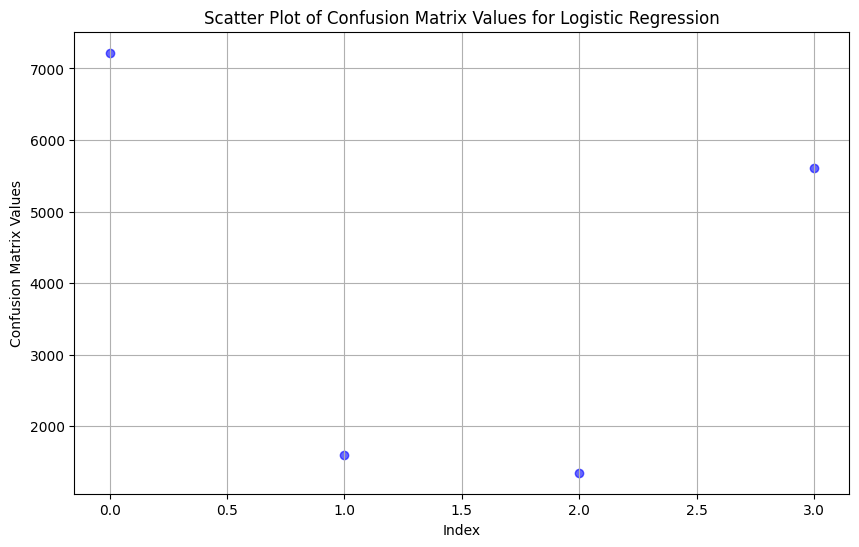

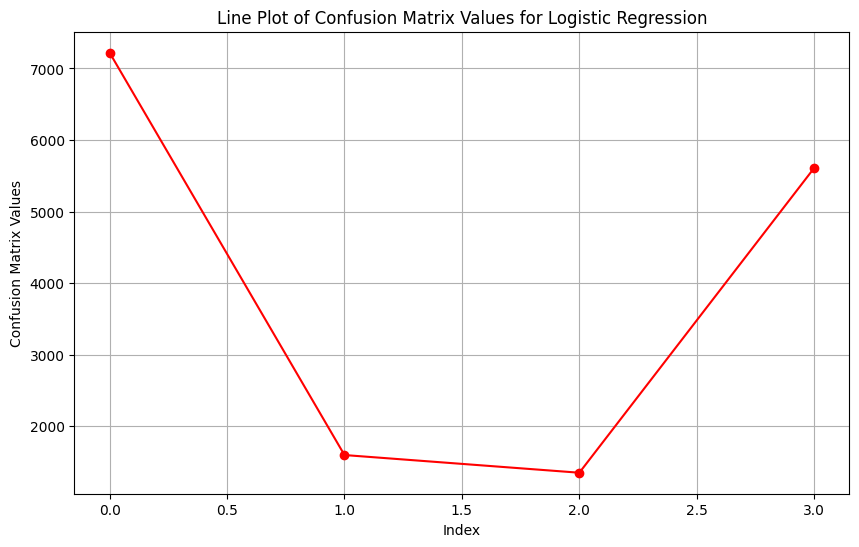

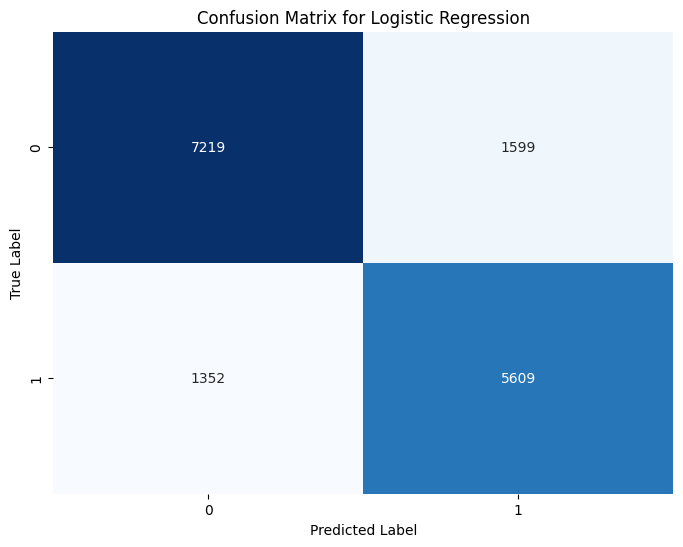

In [37]:
# Create scatter plot, line plot, and confusion matrix for each model
for model_name, cm in confusion_matrices.items():
    # Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(cm.ravel())), cm.ravel(), color='blue', alpha=0.6)
    plt.title(f'Scatter Plot of Confusion Matrix Values for {model_name}')
    plt.xlabel('Index')
    plt.ylabel('Confusion Matrix Values')
    plt.grid(True)
    plt.show()

    # Line Plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cm.ravel())), cm.ravel(), linestyle='-', marker='o', color='red')
    plt.title(f'Line Plot of Confusion Matrix Values for {model_name}')
    plt.xlabel('Index')
    plt.ylabel('Confusion Matrix Values')
    plt.grid(True)
    plt.show()

    # Heatmap of Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

2466/2466 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


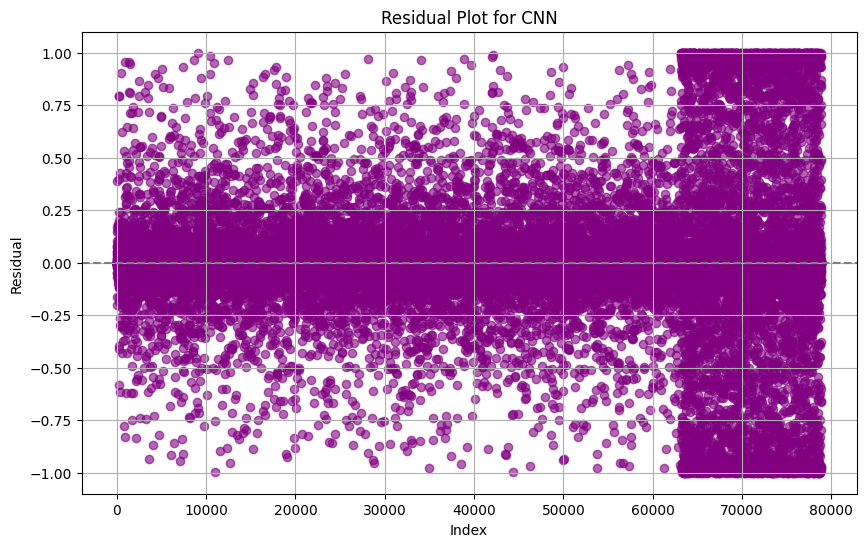

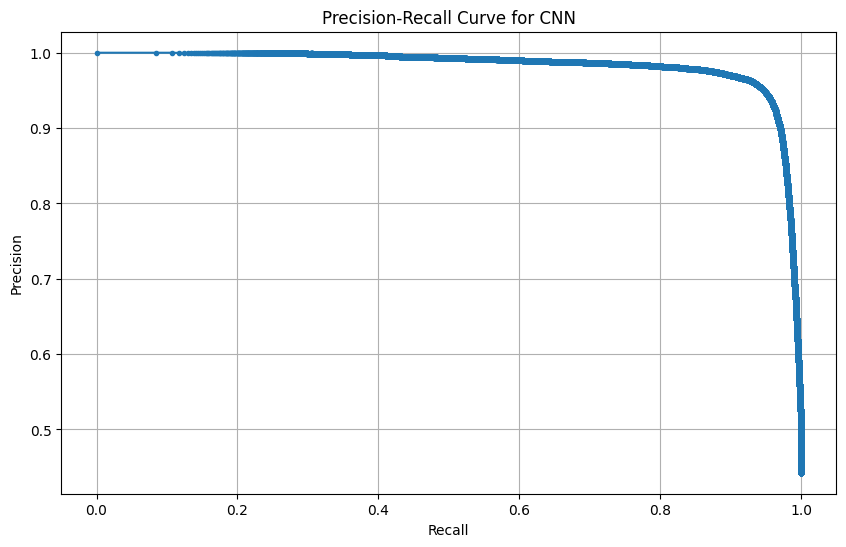

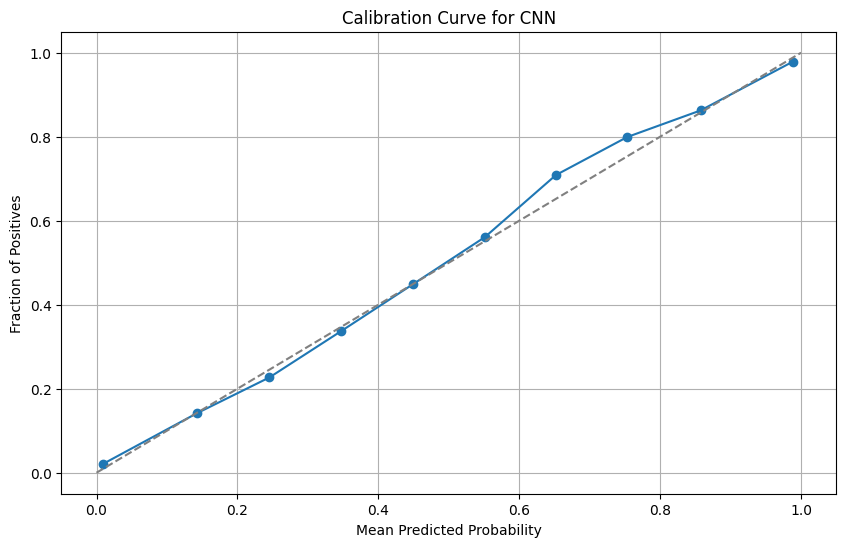

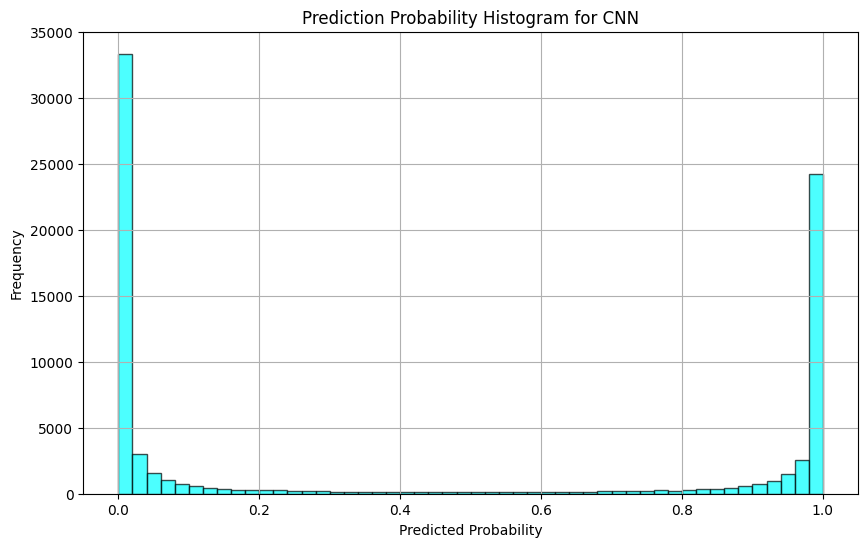

2466/2466 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step


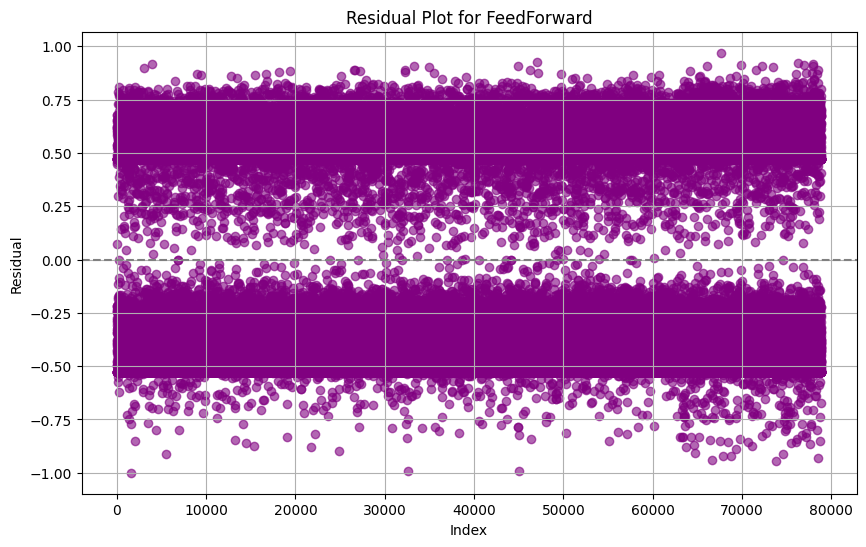

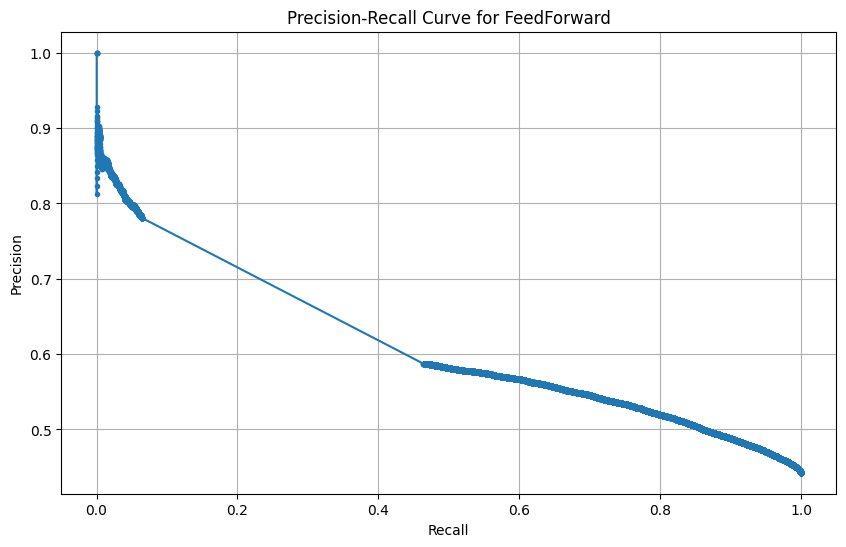

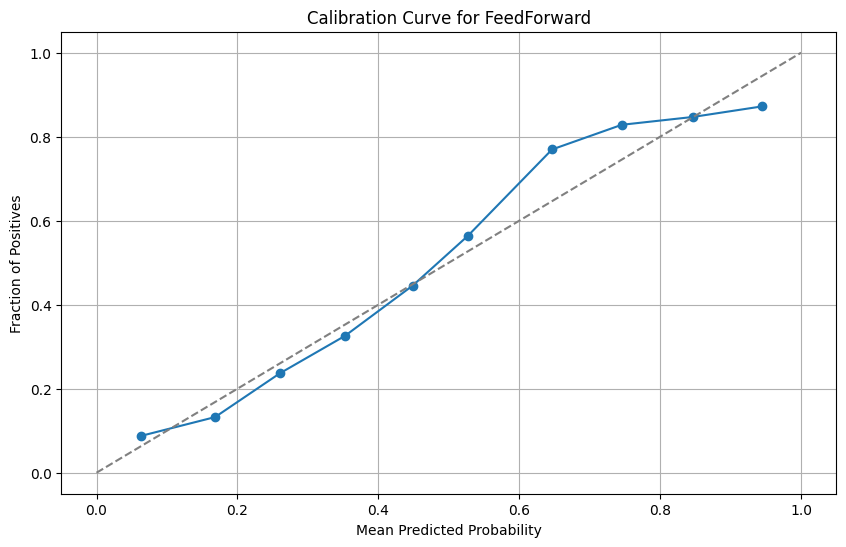

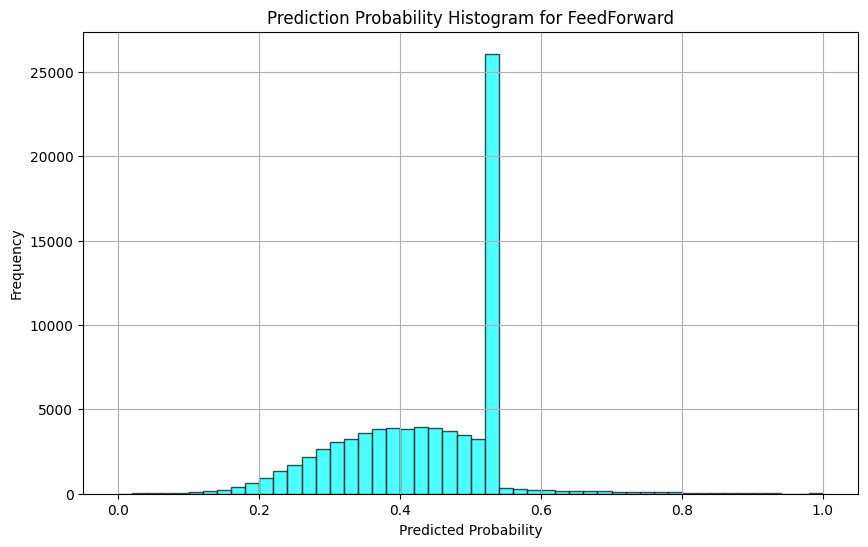

2466/2466 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step


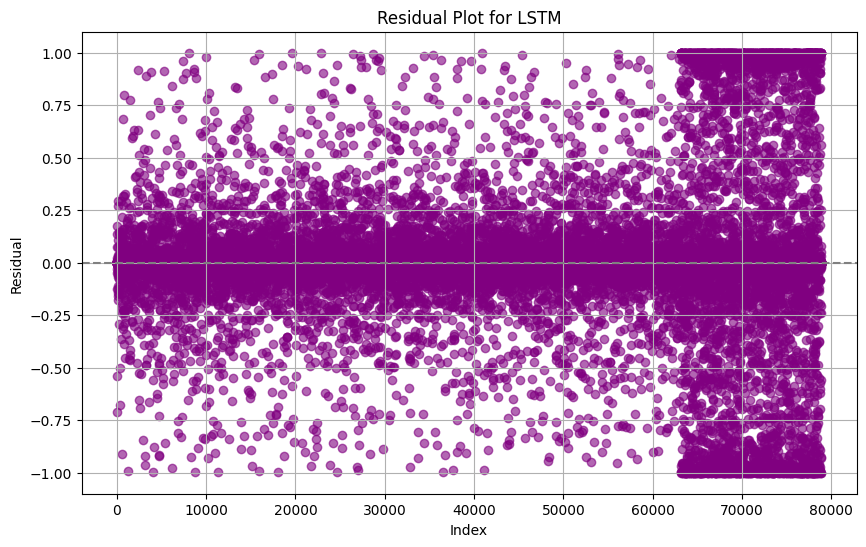

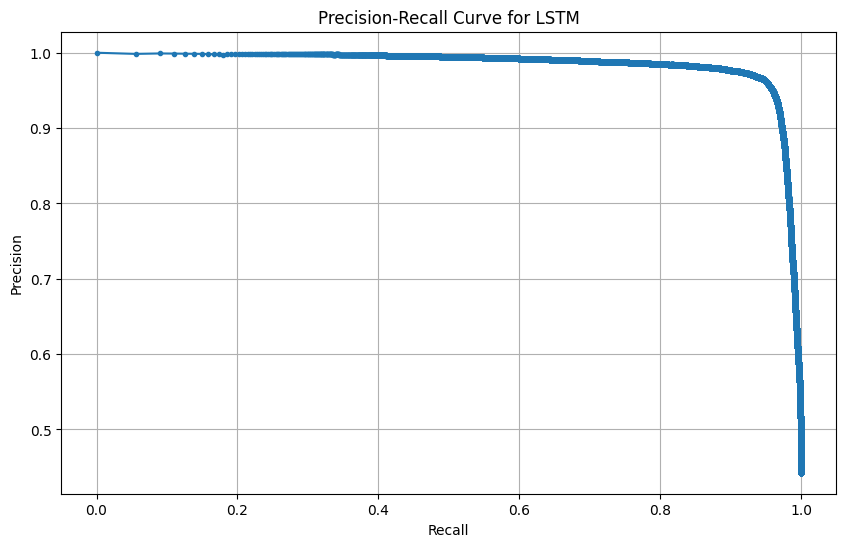

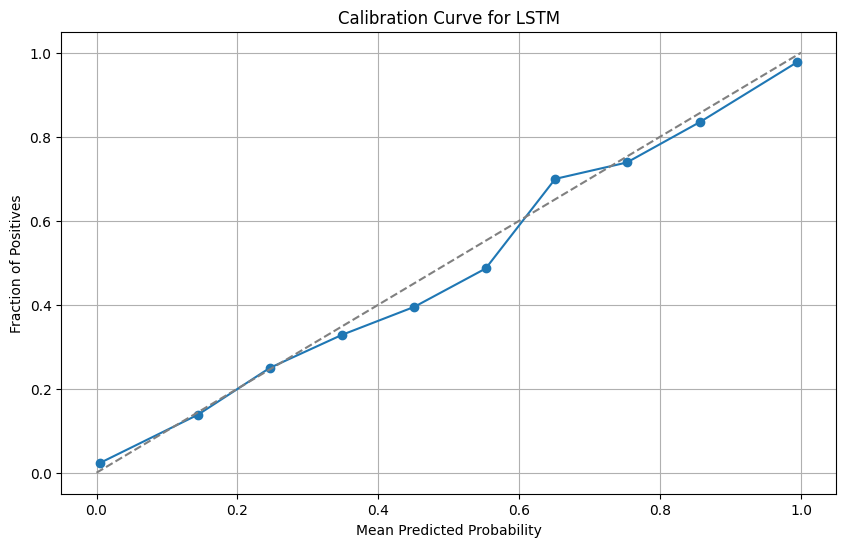

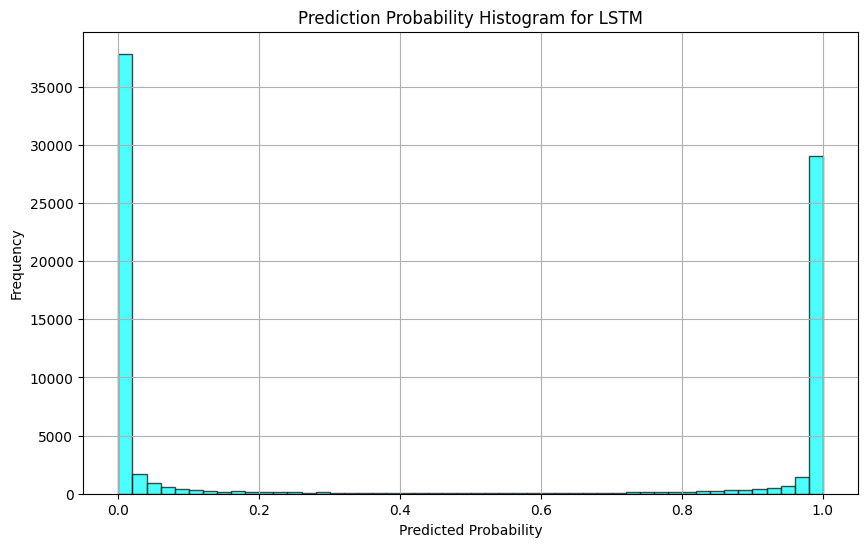

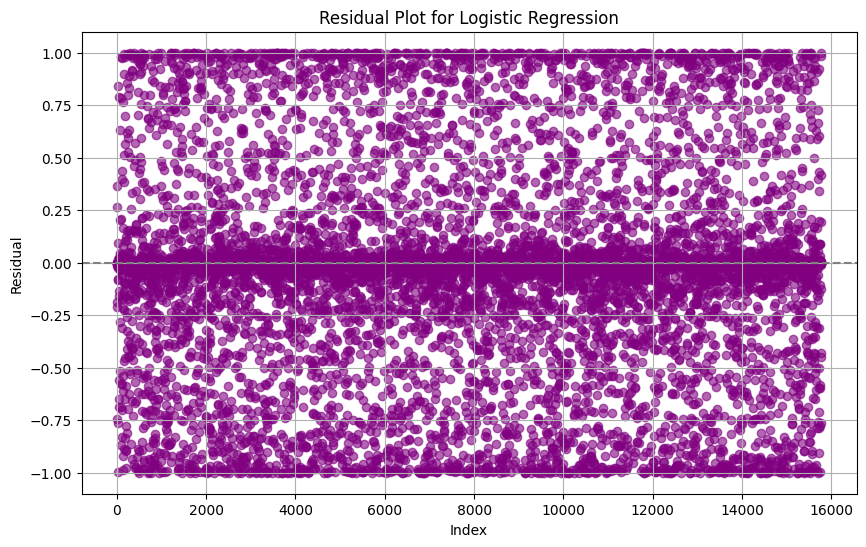

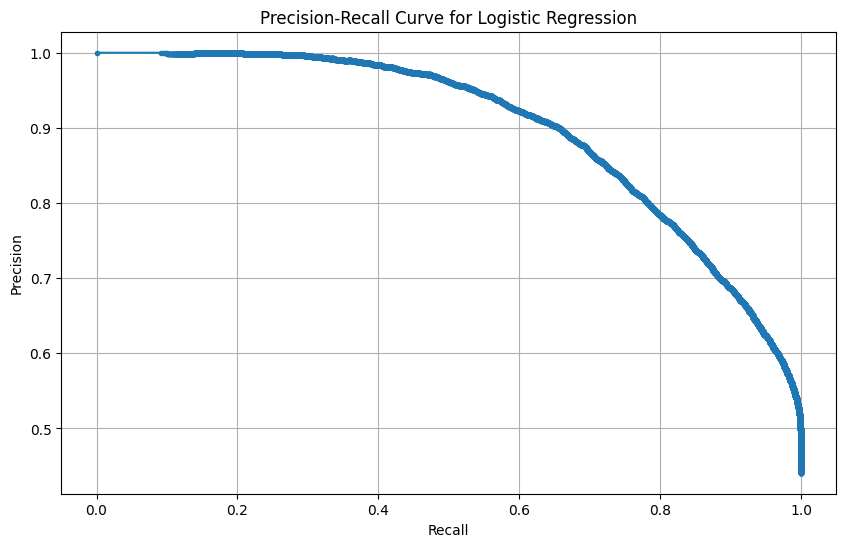

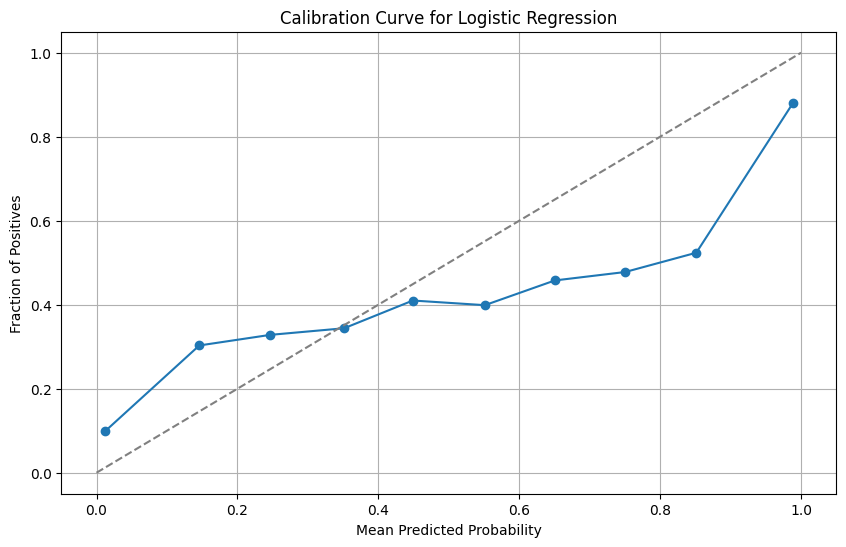

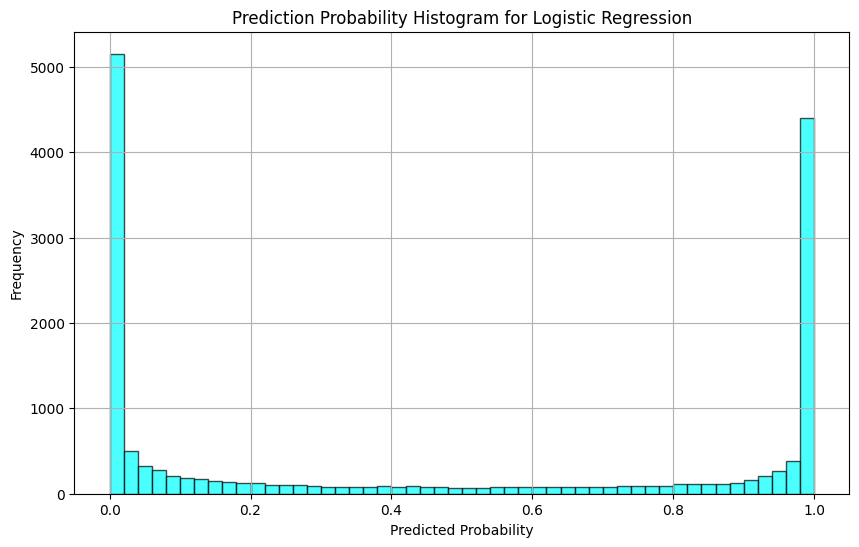

In [40]:
# Create residual plots, precision-recall curves, calibration curves, and histograms for each model
for model_name, metrics in model_metrics.items():
    if model_name in ['CNN', 'FeedForward', 'LSTM']:
        y_true = models_info[model_name]['encoded_labels']
        y_pred = models_info[model_name]['model'].predict(models_info[model_name]['padded_sequences'])
        residuals = y_true - y_pred.flatten()

        # Residual Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.6)
        plt.axhline(0, linestyle='--', color='grey')
        plt.title(f'Residual Plot for {model_name}')
        plt.xlabel('Index')
        plt.ylabel('Residual')
        plt.grid(True)
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_true, y_pred)
        plt.figure(figsize=(10, 6))
        plt.plot(recall, precision, marker='.')
        plt.title(f'Precision-Recall Curve for {model_name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.grid(True)
        plt.show()

        # Calibration Curve
        prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=10)
        plt.figure(figsize=(10, 6))
        plt.plot(prob_pred, prob_true, marker='o')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f'Calibration Curve for {model_name}')
        plt.xlabel('Mean Predicted Probability')
        plt.ylabel('Fraction of Positives')
        plt.grid(True)
        plt.show()

        # Prediction Probability Histogram
        plt.figure(figsize=(10, 6))
        plt.hist(y_pred, bins=50, alpha=0.7, color='cyan', edgecolor='black')
        plt.title(f'Prediction Probability Histogram for {model_name}')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    elif model_name == 'Logistic Regression':
        y_true = models_info['Logistic Regression']['y_test']
        y_pred_prob = models_info['Logistic Regression']['model'].predict_proba(X_test_scaled)[:, 1]
        residuals = y_true - y_pred_prob

        # Residual Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.6)
        plt.axhline(0, linestyle='--', color='grey')
        plt.title(f'Residual Plot for {model_name}')
        plt.xlabel('Index')
        plt.ylabel('Residual')
        plt.grid(True)
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
        plt.figure(figsize=(10, 6))
        plt.plot(recall, precision, marker='.')
        plt.title(f'Precision-Recall Curve for {model_name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.grid(True)
        plt.show()

        # Calibration Curve
        prob_true, prob_pred = calibration_curve(y_true, y_pred_prob, n_bins=10)
        plt.figure(figsize=(10, 6))
        plt.plot(prob_pred, prob_true, marker='o')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f'Calibration Curve for {model_name}')
        plt.xlabel('Mean Predicted Probability')
        plt.ylabel('Fraction of Positives')
        plt.grid(True)
        plt.show()

        # Prediction Probability Histogram
        plt.figure(figsize=(10, 6))
        plt.hist(y_pred_prob, bins=50, alpha=0.7, color='cyan', edgecolor='black')
        plt.title(f'Prediction Probability Histogram for {model_name}')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
